1 1 6 3 7 5 1 7 4 2 
1 3 8 1 3 7 3 6 7 2 
2 1 3 6 5 1 1 3 2 8 
3 6 9 4 9 3 1 5 6 9 
7 4 6 3 4 1 7 1 1 1 
1 3 1 9 1 2 8 1 3 7 
1 3 5 9 9 1 2 4 2 1 
3 1 2 5 4 2 1 6 3 9 
1 2 9 3 1 3 8 5 2 1 
2 3 1 1 9 4 4 5 8 1 
{'weight': 1}


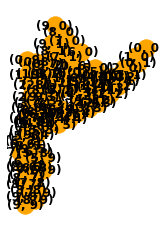

In [2]:
import networkx as nx
from termcolor import colored
import matplotlib.pyplot as plt

# builds a graph where each node is a tuple
# represting the x,y coordinates of a position
# the edges are the up/down left/right neighbors of
# the coordinate with the weight of the edge being
# the risk score.
#
# This will allow us to use a shortest path algorithm
# to determine the path with the lowest risk score.
def build_graph(grid):
  graph = nx.Graph()
  # add nodes
  for r, row in enumerate(grid):
    for c in range(len(row)):
      graph.add_node((r, c))
   
  # add edges
  neighbors = {
    "up":    (-1,  0),
    "down":  ( 1,  0),  
    "left":  ( 0, -1),
    "right": ( 0,  1)
  }
  for r, row in enumerate(grid):
    for c in range(len(row)):
      for n in neighbors: 
        rr = r + neighbors[n][0]
        rc = c + neighbors[n][1]
        if any([
          rr < 0,
          rr > len(grid) - 1,
          rc < 0, 
          rc > len(row) - 1
        ]): continue
        a = (r,c)
        b = (rr, rc)
        weight = grid[rr][rc]
        graph.add_edge(a, b, weight=weight)
  return graph

def print_path(grid, path):
  for r, row in enumerate(grid):
    for c in range(len(row)):
      if (r, c) in path: 
        print(colored(grid[r][c], 'red', attrs=['bold']), end=' ')
      else:
        print(grid[r][c], end=' ')
    print("")

grid = [[ int(x) for x in list(line.strip()) ] for line in open("./test.txt", "r").readlines() ]
graph = build_graph(grid)
start = (0,0)
end = (len(grid)-1, len(grid[0])-1)
path = nx.shortest_path(graph, start, end, weight="weight")
print_path(grid,path)


print(graph.get_edge_data((2,3), (1,3)))

plt.subplot(121)
nx.draw(graph, with_labels=True, font_weight='bold', node_color='orange')
